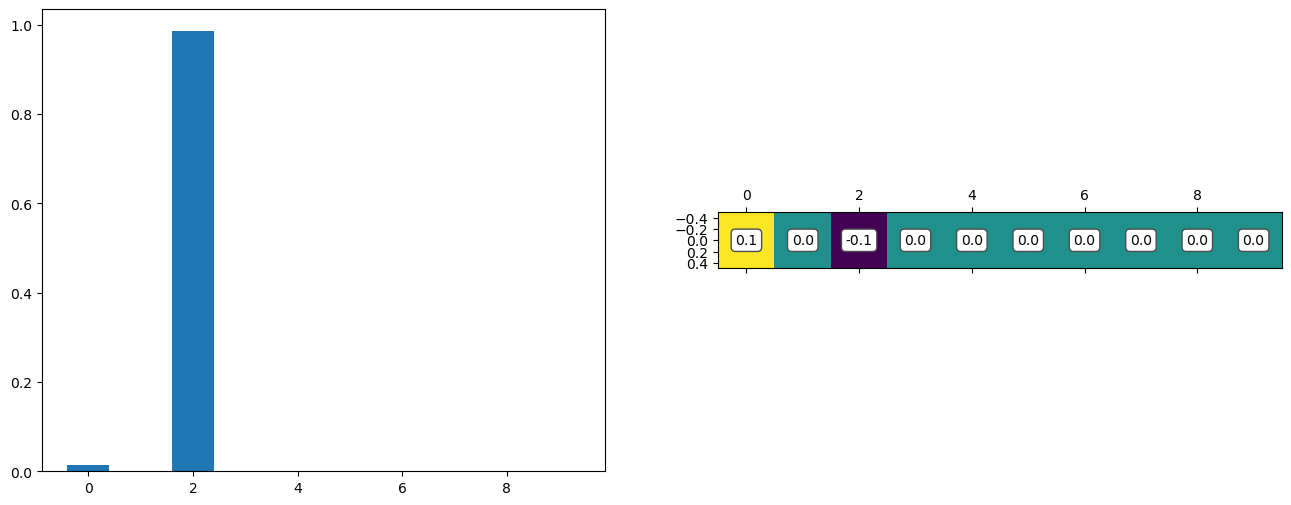

In [277]:
import torch
import torch.nn.functional as F
import torch.autograd.functional as AF
import matplotlib.pyplot as plt
import numpy as np
import math

ndim = 1024
nitems = 10

grads = torch.Tensor(ndim)

# for i in range(1, num_samples + 1):
query = torch.rand(ndim) * 2 - 1
query.requires_grad = True
keys = torch.rand((nitems, ndim)) * 2 - 1
values = keys.clone()
Z = query @ keys.T
# Z = Z / math.sqrt(ndim)
Z.retain_grad()
S = F.softmax(Z, dim=0)
# S = F.softmax(Z / math.sqrt(ndim), dim=0)
S.retain_grad()
out = S[:, None] * values
out.retain_grad()
out.backward(torch.ones_like(out))
# print(out.grad)

# print(grads)

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(list(range(10)), S.detach().numpy())
ax2.matshow(Z.grad.unsqueeze(0))
for (i, j), z in np.ndenumerate(Z.grad.unsqueeze(0)):
    ax2.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))